Linear Regression Equation - Normal Equation<br>
$ \hat{\theta} = (X^{T}X)^{-1} X^{T} y $ <br>
$ \hat{\theta} - \text{Minimises the cost function} $ <br>
$ y - \text{vector of the target values containing } y^{(1)} \text{ to } y^{(m)} $ 

In [2]:
import numpy as np
np.random.seed(42)

In [3]:
x = 2 * np.random.rand(100,1)
y = 4 + 3 *  x + np.random.randn(100,1)

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('dark_background')

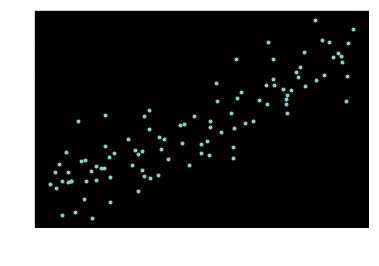

In [5]:
plt.scatter(x,y,marker='.')
plt.xlabel("X1")
plt.ylabel("Y",rotation=0)
plt.show()

In [6]:
x_b = np.c_[np.ones((100,1)),x] # adding x0 = 1 to each instance

In [7]:
x_b

array([[1.        , 0.74908024],
       [1.        , 1.90142861],
       [1.        , 1.46398788],
       [1.        , 1.19731697],
       [1.        , 0.31203728],
       [1.        , 0.31198904],
       [1.        , 0.11616722],
       [1.        , 1.73235229],
       [1.        , 1.20223002],
       [1.        , 1.41614516],
       [1.        , 0.04116899],
       [1.        , 1.9398197 ],
       [1.        , 1.66488528],
       [1.        , 0.42467822],
       [1.        , 0.36364993],
       [1.        , 0.36680902],
       [1.        , 0.60848449],
       [1.        , 1.04951286],
       [1.        , 0.86389004],
       [1.        , 0.58245828],
       [1.        , 1.22370579],
       [1.        , 0.27898772],
       [1.        , 0.5842893 ],
       [1.        , 0.73272369],
       [1.        , 0.91213997],
       [1.        , 1.57035192],
       [1.        , 0.39934756],
       [1.        , 1.02846888],
       [1.        , 1.18482914],
       [1.        , 0.09290083],
       [1.

In [8]:
theta = np.linalg.inv(x_b.T @ x_b) @ x_b.T @ y

In [9]:
theta 
# noise makes it impossible to get the exact values. 

array([[4.21509616],
       [2.77011339]])

The theta value is very close to our normal equation. 

In [10]:
x_new = np.array([[0],[2]])
x_new_b = np.c_[np.ones((2,1)),x_new]
y_predict = x_new_b @ theta

In [11]:
y_predict

array([[4.21509616],
       [9.75532293]])

In [12]:
x_new

array([[0],
       [2]])

In [13]:
x_new_b

array([[1., 0.],
       [1., 2.]])

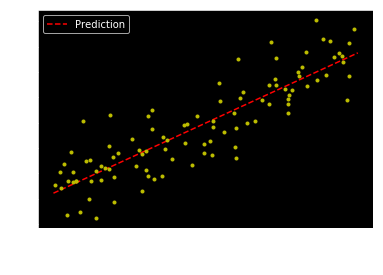

In [20]:
plt.plot(x_new,y_predict,"r--",label='Prediction')
plt.plot(x,y,"y.")
plt.xlabel("$x$",size=20)
plt.ylabel("$y$",rotation=0,size=20)
plt.legend() ; plt.show()

Performing the same Linear regression with sklearn

In [21]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x,y)
lin_reg.intercept_,lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [22]:
lin_reg.predict(x_new)

array([[4.21509616],
       [9.75532293]])

Based on scipy.linalg.lstsq 

In [23]:
theta_best_svd, residuals,rank,s = np.linalg.lstsq(x_b,y,rcond=-1)

In [24]:
theta_best_svd

array([[4.21509616],
       [2.77011339]])

$ \hat{\theta} = X^{+}y $ <br>
$ X^{+} \text{ is the pseudoinverse / moore penrose inverse} $

In [25]:
np.linalg.pinv(x_b).dot(y)

array([[4.21509616],
       [2.77011339]])

Pseduoinverse is computed via matrix factorization technique called SVD
This is more efficient than the normal equation as if the matrix $ X^{T} $ is not invertiable or singular. if m < n or if some features are redundant. 
pseudo inverse is always defined. 

##### Compuational Complexity 

Both Normal equation ($ O(n^{2.4})$ to $ O(n^{3})$)  and the SVD approach ($ O(n^{2})$)is high and the approach will be slow when the number of features grows large.<br>
+ve - both are linear with regards to the number of instances so they are O(m) <br>

Once the linear regression model is trained on the above method, the prediction is very fast. <br>
making prediction on twice many instances will just take roughly twice as much time 

##### Gradient Descent
A very general optimization algorithm capable of finding the optimal solution. 
**The idea is to tweak parameters iteratively in order to minimize a cost function**

In [26]:
def lipschitz(x): return np.sqrt(x**2 + 5)

In [27]:
lipschitz(100)

100.024996875781

The training model searches for a combination of model parameters that minimizes a cost function (over a training set). It is a search in the model's parameter space. The more the parameters a model has the more dimensions this space has. 

When using gradient descent ensure all the features are at similar scale. StandardScaler class helps in scaling the feature variables. else the algorithm will converge very slowly. 

##### Batch Gradient Descent

$$ \frac{\partial}{\partial{\theta_j}} MSE(\theta) = \frac{2}{m} \sum_{i=1}^m(\theta^Tx^{(i)} - y^{(i)})x_j^{(i)}$$

Calculating how much the cost function will change if you change $\theta_j$ a little bit. Taking the partial derivative 

we calculate the $\nabla_\theta MSE(\theta) = \frac{2}{m}X^T(X\theta - y)$ 

Calculating the gradient step $ \theta^{\text{next step}} = \theta - \eta\nabla_\theta MSE(\theta) $

In [28]:
eta = 0.1 # 
n_iterations = 100
theta = np.random.randn(2,1) 
m = x.size
for i in range(n_iterations):
    gradients = 2/m * x_b.T @ (x_b @ theta - y)
#     print(f"gradient value {i}",str(gradients),f"Theta value {i}",str(theta),"\n")
    theta = theta - eta * gradients

In [29]:
theta

array([[4.16104533],
       [2.81783733]])

In [30]:
theta = np.random.randn(2,1) 

How to set the number of iterations. <br>
if its too low, you will still be far away from the optimal solution, it will take a long time<br>
if the rate is high, the algorithm diverges and jumping all over the place and actually getting further and further away from the step. <br>

To get a good learning rate we need to use Grid search and limit the number of iterations so that grid search can eliminate models that take too long to converge. <br>

How to get the number of iterations? <br>

>set a large iteration number and interrupt the algorithm when the gradient vector becomes tiny
norm becomes smaller to a tiny number $\epsilon$ (tolerance). Then the gradient has almost reached minimum

Stochastic Gradient Descent

SGD overcomes the negatives of the batch gradient descent which is uses the whole training set to compute the gradient at every step. <br>

SGD picks random instance in the training set at every step and computes the gradients based only on that single instance. 

SGD helps in getting out of the local minima due to the random points being taken. 
however,it will never settle down once the global minima is reached.

A process similar to simulated annealing algorithm is used where reduce the learning rate slowly  at each iteration. 

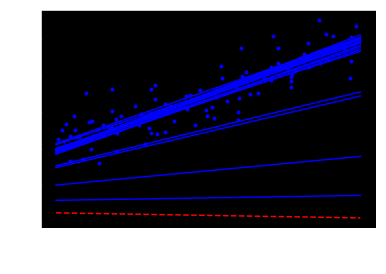

In [31]:
theta_path_sgd = []
np.random.seed(42)
n_epochs = 50 
t0, t1 = 5,50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)
m = len(x_b)

theta = np.random.randn(2,1) # intialize a random theta

for epoch in range(n_epochs):
    for i in range(m):
        if (epoch == 0 and i < 20):
            y_predict = x_new_b @ theta
            style = "b-" if i > 0 else "r--"
            plt.plot(x_new,y_predict,style)
        random_index = np.random.randint(m)
        xi = x_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T @ (xi @ theta - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)
plt.plot(x,y,"b.")
plt.xlabel("$x_1$",fontsize=18)
plt.ylabel("$y_1$",fontsize=18,rotation=0)
plt.show()

In [32]:
theta

array([[4.21076011],
       [2.74856079]])

For stochastic gradient descent the training instances must be independent and indentically distributed 
When using stochastic gradient descent always pick the xi and yi at random else the SGD will start to optimize one label after another and will not settle close to the global minimum

##### Performing Linear Regression with SGD

The SGD regressor defaults to optimizing the squared error cost function. 

In [33]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000,tol=1e-3,penalty=None,eta0=1e-1)
sgd_reg.fit(x,y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [34]:
sgd_reg.intercept_,sgd_reg.coef_

(array([4.23868557]), array([2.82181634]))

Mini-batch gradient descent
Similar to SGD, at every step instead of computing gradients based on just one instance, Mini batch gradient computs the gradients on small random sets of instances. 

>The advantage over SGD is that we can get a performance boost from the hardware optimization of matrix operations. 

In [35]:
x_new_b

array([[1., 0.],
       [1., 2.]])

##### Polynomial Regression 
The data is not linear and is more complex. add powers of feature as new features, then train the model on this extended set of features. 

In [36]:
np.random.seed(42)
m = 100
x = 6 * np.random.rand(m,1) - 3
y = 0.5 * x**2 + x + 2 + np.random.randn(m,1)

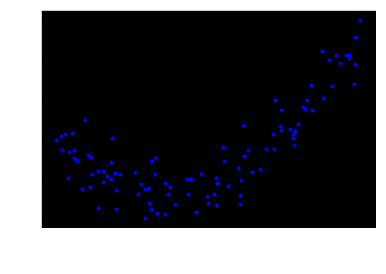

In [37]:
plt.plot(x,y,'b.')
plt.xlabel("$x_1$",fontsize=18)
plt.ylabel("$y_1$",fontsize=18,rotation=0)
plt.show()

In [38]:
from sklearn.preprocessing import PolynomialFeatures
ply_features = PolynomialFeatures(degree=2,include_bias=False)

In [39]:
x_poly = ply_features.fit_transform(x)

In [40]:
x[0]

array([-0.75275929])

In [41]:
x_poly[0]

array([-0.75275929,  0.56664654])

In [42]:
lin_reg = LinearRegression()

In [43]:
lin_reg.fit(x_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
lin_reg.intercept_,lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

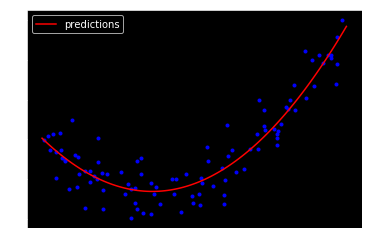

In [45]:
x_new = np.linspace(-3,3,100).reshape(100,1)
x_new_poly = ply_features.transform(x_new)
y_new = lin_reg.predict(x_new_poly)
plt.plot(x,y,'b.')
plt.plot(x_new,y_new,'r-',label='predictions')
plt.legend()
plt.show()

When there are multiple features, Polynomial Regression is capable of finding relationships between the features 

PolynomialFeatures degree=d transforms an array containing n features into an array containing 
$ \frac{(n+d)!}{d!n!}$ features

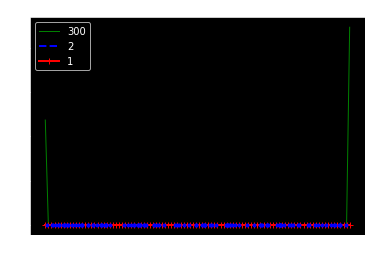

In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (('g-',1,300),('b--',2,2),('r+-',2,1)):
    ply_more = PolynomialFeatures(degree=degree,include_bias=False)
    std_scalar = StandardScaler()
    lin_alg = LinearRegression()
    polynomial_reg = Pipeline([
        ('poly regression',ply_more),
        ('standard scalar',std_scalar),
        ('linear regression',lin_alg)
    ])
    polynomial_reg.fit(x,y)
    y_newbig = polynomial_reg.predict(x_new)
    plt.plot(x_new,y_newbig,style,label=str(degree),linewidth=width)

plt.plot(x,y,'b.',linewidth=3)
plt.legend(loc='upper left')
plt.show()

In [51]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


In [70]:
def learning_curves(model,x,y):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
    train_errors,test_errors =[],[]
    for m in range(1,len(x_train)):
        model.fit(x_train[:m],y_train[:m])
        y_train_predict = model.predict(x_train[:m])
        y_val_predict = model.predict(x_test)
        train_errors.append(mean_squared_error(y_train[:m],y_train_predict))
        test_errors.append(mean_squared_error(y_test,y_val_predict))
    plt.plot(np.sqrt(train_errors),'b-',linewidth=2,label='Train')
    plt.plot(np.sqrt(test_errors),'r+-',linewidth=2,label='Test')
    plt.xlabel('Training set size')
    plt.ylabel('RMSE')
    plt.legend(loc='best')

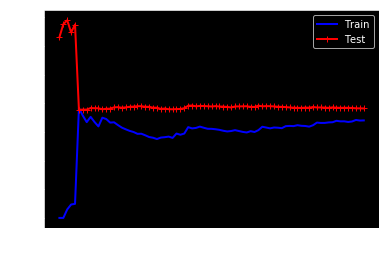

In [71]:
lin_reg = LinearRegression()
learning_curves(lin_reg,x,y)

At first the training model has only 2 instances so it can fit the model perfectly untill new data points are fed. 

The training error is initially very low and starts to increase and adding new data points doesn't make it better or worse 

The test error initialy is very high as the model cannot generalize and when the new data points are added it starts to decrease 

Both training and test error at somepoints hovers a point and are underfitted as the test and training RMSE are pretty close. 

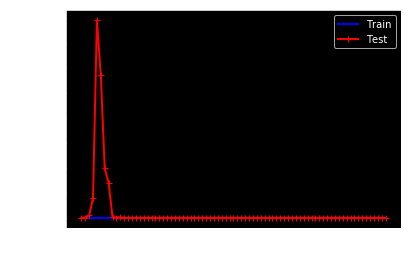

In [76]:
from sklearn.pipeline import Pipeline
poly_features = Pipeline([
    ("poly",PolynomialFeatures(degree=10,include_bias=False)),
    ("lin",LinearRegression())
])

learning_curves(poly_features,x,y)

##### Regularized Linear Models

for linear model, regularization is mostly achieved by constraining the weights of the model.

**Ridge Regression** also called Tikhonov regularization is a regularized version of the Linear regression 

Regularization term  $\alpha\Sigma_{i=1}^{n}\theta_{i}^{2}$ is added to the cost function. 

this forces the learning algorithm to not only fit the data but also keep the model weights as small as possible. 

$J(\theta) = \text{MSE}(\theta) + \alpha\frac{1}{2}\Sigma^{n}_{i}\theta_i^2$

